<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

A comparison of log-fold changes between SMS and 16S

In [1]:
# This block is just for importing the necessary libraries.  
import os
from collections import defaultdict
# Numerical libraries
import pandas as pd
import numpy as np
import biom
import arviz as az
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr, spearmanr
from gneiss.balances import sparse_balance_basis
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib_venn import venn2, venn3
# custom utility and plotting functions
from util import (extract_differentials, select_features, 
                  get_genomic_data, collapse_transcripts, 
                  aggregate_pathways,
                  ranking, btest, log_pvalue, read_kegg_dict,
                  ilr_transform_differentials,
                  rename_clades, create_projection,
                  match_all_differentials)
from plot import (rankplot, networkplot, vectorplot)
import random

# directory paths
amp_directory = '../sfari/data/sra/Combined'
wgs_directory = '../sfari/data/sra_shotgun/Combined'
rna_directory = '../sfari/data/recount3'
kang_directory = '../sfari/data/sra/Kang2017'
sepp_directory = '../sfari/data/sra/Kang2017/deblur/sepp'
results_dir = '../results'
kegg_dir = f'{results_dir}/kegg'
hsa_dir = f'{results_dir}/hsa_kegg'
np.random.seed(0)
random.seed(0)
%matplotlib inline

In [2]:
data_dir = '../sfari/data/sra/Dan2020'

amp_diffs = extract_differentials(f'{data_dir}/age_sex_matched_posterior-genus.nc')

data_dir = '../sfari/data/sra_shotgun/Dan2020/age_sex_matched_posterior'
sms_diffs = extract_differentials(f'{data_dir}/ogus_differentials-genus.nc')

In [3]:
len(set(amp_diffs.index) & set(sms_diffs.index))

298

In [4]:
common_taxa = list(set(amp_diffs.index) & set(sms_diffs.index))

In [5]:
amp_diffs = amp_diffs.loc[common_taxa]
sms_diffs = sms_diffs.loc[common_taxa]

amp_diffs -= amp_diffs.mean(axis=0)
sms_diffs -= sms_diffs.mean(axis=0)

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

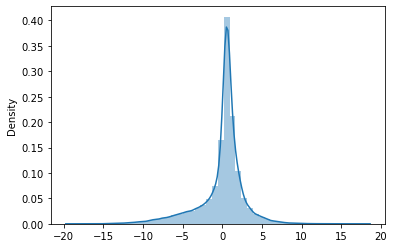

In [6]:
sns.distplot(amp_diffs.values.ravel())

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

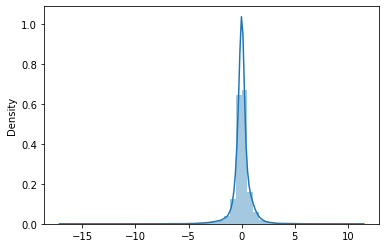

In [7]:
sns.distplot(sms_diffs.values.ravel())

Text(0, 0.5, 'SMS log fold change')

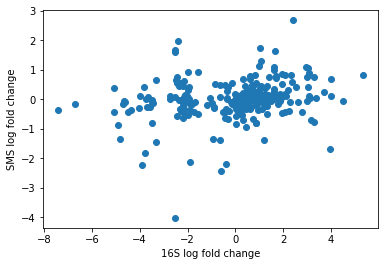

In [8]:
plt.scatter(amp_diffs.mean(axis=1), sms_diffs.mean(axis=1))
plt.xlabel('16S log fold change')
plt.ylabel('SMS log fold change')

In [9]:
from scipy.stats import pearsonr
pearsonr(amp_diffs.mean(axis=1), sms_diffs.mean(axis=1))

(0.22920592306478155, 6.514108112059523e-05)

In [10]:
amp_subdiffs = amp_diffs.loc[amp_diffs.std(axis=1) < 0.5]
sms_subdiffs = sms_diffs.loc[amp_subdiffs.index]

(-2.0, 2.0)

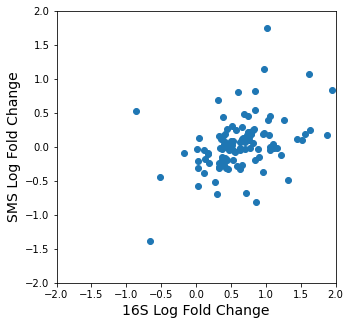

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(amp_subdiffs.mean(axis=1), 
           sms_subdiffs.mean(axis=1))
ax.set_xlabel('16S Log Fold Change', fontsize=14)
ax.set_ylabel('SMS Log Fold Change', fontsize=14)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
#ax.plot([-2, 2], [-2, 2], c='r')

In [12]:
pearsonr(amp_subdiffs.mean(axis=1), sms_subdiffs.mean(axis=1))

(0.47102970935708677, 1.0801782202970554e-07)